<a href="https://colab.research.google.com/github/Prajwal-ishwar-naik/tree-species-classification/blob/main/TreeSpeciesCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!git clone https://github.com/Prajwal-ishwar-naik/tree-species-classification.git
%cd tree-species-classification

Cloning into 'tree-species-classification'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 50 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 19.49 MiB | 8.19 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/tree-species-classification


In [8]:
import os
os.listdir('/content/drive/My Drive')

['archive (6).zip', 'Colab Notebooks']

In [9]:
import zipfile
zip_path = '/content/drive/My Drive/archive (6).zip'
extract_path = '/content/tree_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Unzipped successfully.")

Unzipped successfully.


In [10]:
import os
inner_path = '/content/tree_dataset/Tree_Species_Dataset'
print("Tree species folders:", os.listdir(inner_path))

Tree species folders: ['coconut', 'gunda', 'saptaparni', 'jamun', 'pilikaren', 'shirish', 'champa', 'nilgiri', 'mango', '.git', 'cactus', 'kanchan', 'khajur', 'vad', 'sugarcane', 'babul', 'bili', 'garmalo', 'kesudo', 'neem', 'banyan', 'other', 'bamboo', 'sitafal', 'sonmahor', 'amla', 'simlo', 'motichanoti', 'asopalav', 'gulmohor', 'pipal']


In [11]:
len(os.listdir(inner_path))

31

In [12]:
class_dirs = os.listdir(inner_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [13]:
import glob
image_paths = []
labels = []

for class_name in os.listdir(inner_path):
    class_folder = os.path.join(inner_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [14]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(inner_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
other              150
gunda               50
coconut             50
jamun               50
pilikaren           50
shape:  (31, 1)


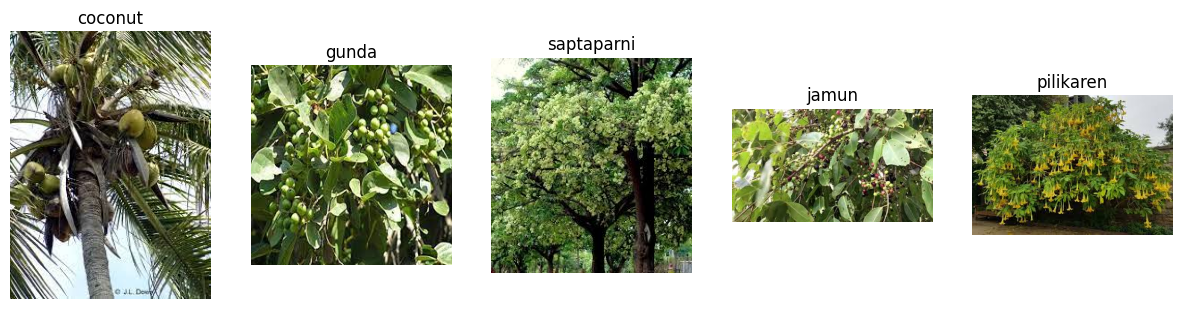

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(inner_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(inner_path, class_dir, os.listdir(os.path.join(inner_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(inner_path, class_dirs)

In [16]:
import os
from PIL import Image
import pandas as pd

repo_path = '/content/tree_dataset/Tree_Species_Dataset'
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith('.')]

image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            print(f"❌ Skipping: {img_path}")
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print("✅ Image shapes loaded successfully:")
print(shapes_df.head())

✅ Image shapes loaded successfully:
   Width  Height
0    194     259
1    275     183
2    297     169
3    194     259
4    194     259


In [17]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [18]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [19]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


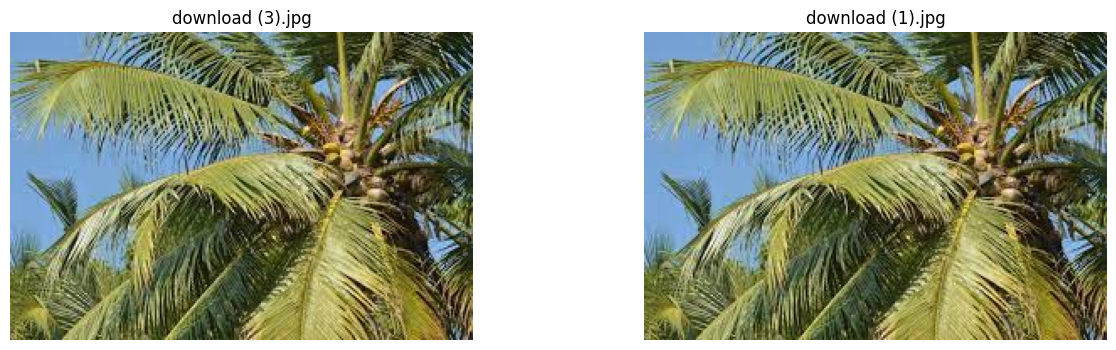

Duplicate set 2:


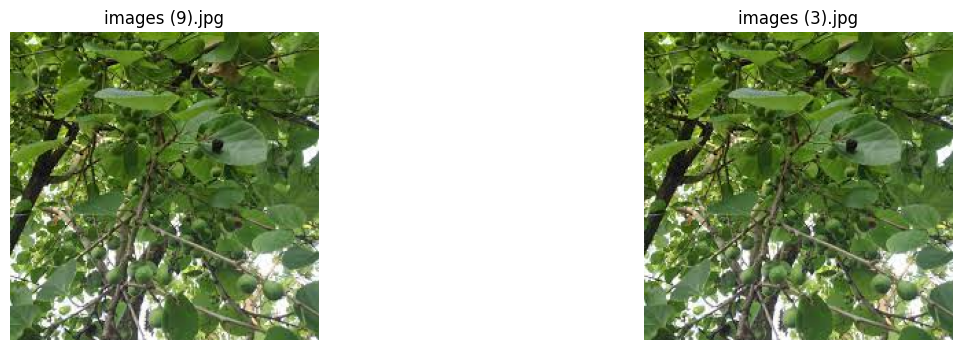

Duplicate set 3:


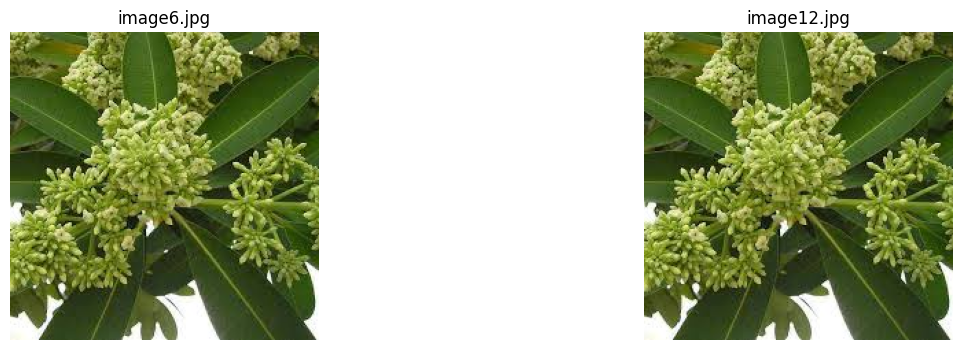

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1
show_duplicate_sets(duplicates, sets_to_display=3)


In [21]:
import os

removed_count = 0

for dup_list in duplicates.values():
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [22]:
hashes = defaultdict(list)
for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [23]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]
print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


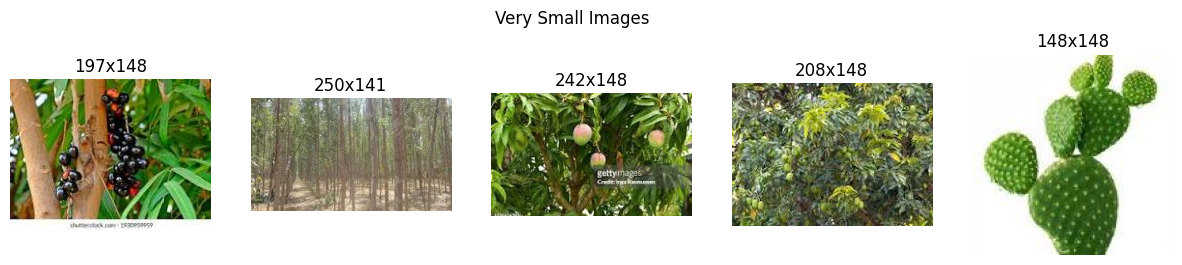

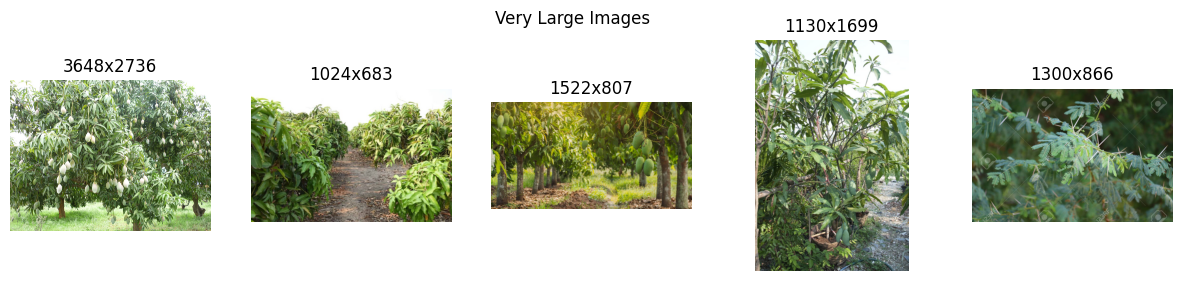

In [24]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [25]:
import os
outliers = pd.concat([small_imgs, large_imgs])
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [26]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [27]:
!pip install tensorflow

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [29]:
!pip install tensorflow

In [30]:
!pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.6 MB/s eta 0:00:00


In [42]:
#EFFICIENT NET
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [43]:
EPOCHS = 30

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 54s 933ms/step - accuracy: 0.0501 - loss: 3.4708 - val_accuracy: 0.0903 - val_loss: 3.3951
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 500ms/step - accuracy: 0.0618 - loss: 3.4296 - val_accuracy: 0.0903 - val_loss: 3.3826
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 454ms/step - accuracy: 0.0783 - loss: 3.4200 - val_accuracy: 0.0903 - val_loss: 3.3775
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 499ms/step - accuracy: 0.0730 - loss: 3.3991 - val_accuracy: 0.0903 - val_loss: 3.3761
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 441ms/step - accuracy: 0.0804 - loss: 3.3929 - val_accuracy: 0.0903 - val_loss: 3.3770
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 440ms/step - accuracy: 0.0746 - loss: 3.3869 - val_accuracy: 0.0903 - val_loss: 3.3730
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 443ms/step - accuracy: 0.0896 - loss: 3.3828 - val_accuracy: 0.0903 - val_loss: 3.3742
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - accuracy: 0.0756 - loss: 3.4016 - val_accu

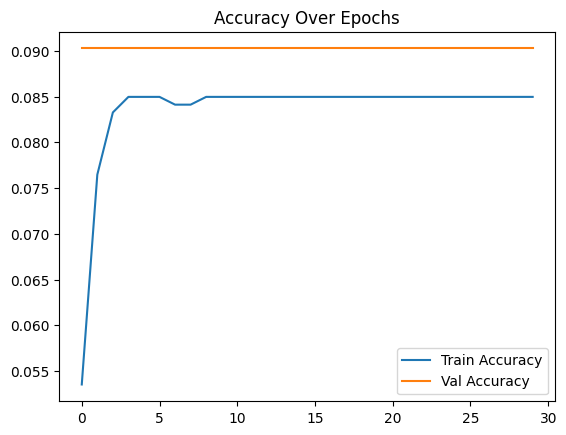

In [44]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# Train the model
EPOCHS = 80
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.
Epoch 1/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 555ms/step - accuracy: 0.0729 - loss: 3.5949 - val_accuracy: 0.1047 - val_loss: 3.2639
Epoch 2/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.1140 - loss: 3.2098 - val_accuracy: 0.1661 - val_loss: 2.9987
Epoch 3/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.1464 - loss: 3.0479 - val_accuracy: 0.1949 - val_loss: 2.8174
Epoch 4/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.1633 - loss: 2.9598 - val_accuracy: 0.1986 - val_loss: 2.8444
Epoch 5/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.1917 - loss: 2.8917 - val_accuracy: 0.2491 - val_loss: 2.7424
Epoch 6/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 505ms/step - accuracy: 0.2123 - loss: 2.7315 - val_accuracy: 0.2166 - val_loss: 2.7163
Epoch 7/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 451ms/step - accuracy: 0.2245 - loss: 2.7134 - val_accuracy: 0.2744 - val_loss: 2.5799
Epoch 8/80
3

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


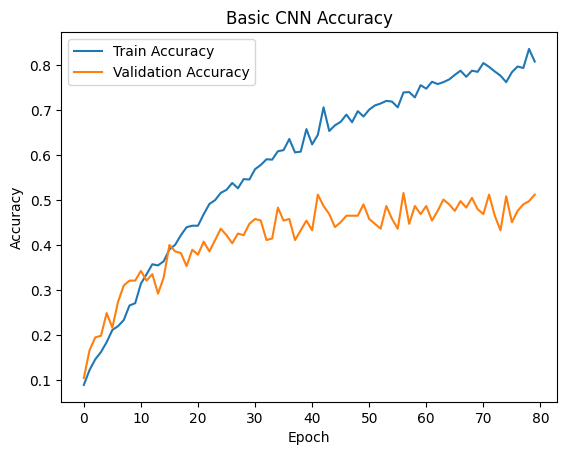

In [48]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # ✅ Changed to 31 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=85)

model.save("improved_cnn_model.h5")


Epoch 1/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 583ms/step - accuracy: 0.0688 - loss: 5.1041 - val_accuracy: 0.0289 - val_loss: 6.7633
Epoch 2/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 448ms/step - accuracy: 0.1243 - loss: 3.2768 - val_accuracy: 0.0325 - val_loss: 11.8720
Epoch 3/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 447ms/step - accuracy: 0.1189 - loss: 3.1818 - val_accuracy: 0.0325 - val_loss: 13.5393
Epoch 4/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.1312 - loss: 3.1403 - val_accuracy: 0.0289 - val_loss: 17.2792
Epoch 5/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.1418 - loss: 3.1423 - val_accuracy: 0.0289 - val_loss: 15.9265
Epoch 6/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.1658 - loss: 3.0274 - val_accuracy: 0.0289 - val_loss: 17.0484
Epoch 7/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.1639 - loss: 3.0332 - val_accuracy: 0.0794 - val_loss: 12.8462
Epoch 8/85
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.1963 - loss: 2.9605 - va

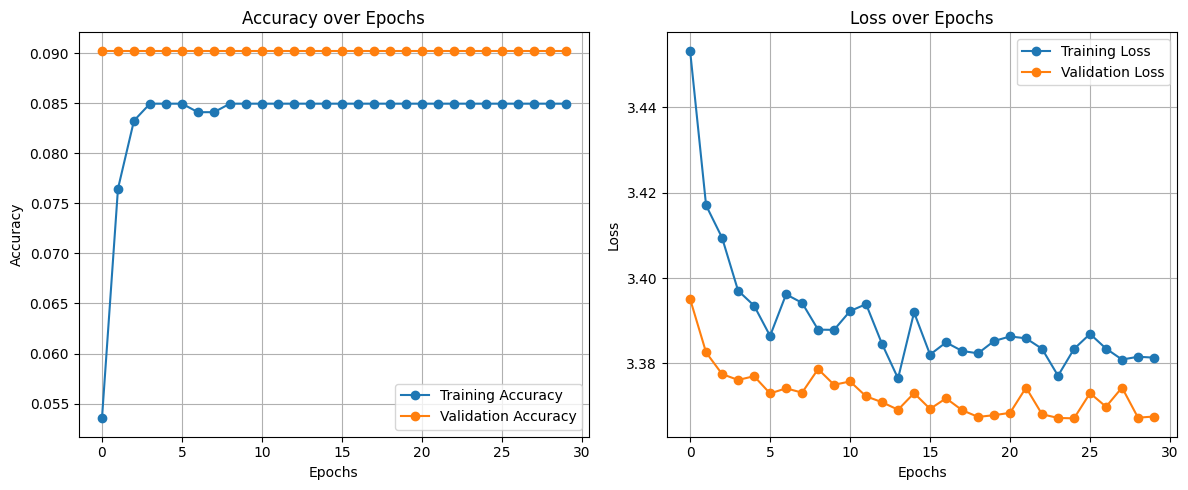

In [54]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
